In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
import warnings
import seaborn as sns
import requests
from io import BytesIO
import nflfastpy as nfl

warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('yearly/2020.csv')


#creating my own categories for analysis


df['HalfPPRFantasyPoints'] = df['FantasyPoints'] + df['Rec']*0.5
df['PPRFantasyPoints'] = df['FantasyPoints'] + df['Rec']
df['TotalYds'] = df['RushingYds'] + df['ReceivingYds']
df['TotalTds'] = df['RushingTD'] + df['ReceivingTD']
df['Rushing_Y/A'] = df['RushingYds'] / df['RushingAtt']
df['Y/Rec'] = df['ReceivingYds'] / df['Rec']
df['Y/Tgt'] = df['ReceivingYds'] / df['Tgt']
df['Tgt/G'] = df['Tgt'] / df['G']


df['FantasyPPG'] = df['FantasyPoints'] / df['G']
df['HalfPPRFantasyPPG'] = df['HalfPPRFantasyPoints'] / df['G']
df['PPRFantasyPPG'] = df['PPRFantasyPoints'] / df['G']
df['Opportunities'] = df['RushingAtt'] + df['Tgt']
df['Touches'] = df['RushingAtt'] + df['Rec']


df['Opportunity/G'] = df['Opportunities'] / df['G']
df['Touches/G'] = df['Touches'] / df['G']
df['YPG'] = df['TotalYds'] / df['G']
df['Y/Touch'] = df['TotalYds'] / df['Touches']
df['TD/Opportunity'] = df['TotalTds'] / df['Touches']



df.head(10)

,Player,Tm,Pos,Age,G,GS,Tgt,Rec,PassingYds,PassingTD,PassingAtt,RushingYds,RushingTD,RushingAtt,ReceivingYds,ReceivingTD,FantasyPoints,Int,Fumbles,FumblesLost,HalfPPRFantasyPoints,PPRFantasyPoints,TotalYds,TotalTds,Rushing_Y/A,Y/Rec,Y/Tgt,Tgt/G,FantasyPPG,HalfPPRFantasyPPG,PPRFantasyPPG,Opportunities,Touches,Opportunity/G,Touches/G,YPG,Y/Touch,TD/Opportunity
0,Derrick Henry,TEN,RB,26,16,16,31,19,0,0,0,2027,17,378,114,0,314.0,0,3,2,323.5,333.0,2141,17,5.362434,6.000000,3.677419,1.937500,19.625000,20.218750,20.812500,409,397,25.562500,24.812500,133.812500,5.392947,0.042821
1,Alvin Kamara,NOR,RB,25,15,10,107,83,0,0,0,932,16,187,756,5,295.0,0,1,0,336.5,378.0,1688,21,4.983957,9.108434,7.065421,7.133333,19.666667,22.433333,25.200000,294,270,19.600000,18.000000,112.533333,6.251852,0.077778
2,Dalvin Cook,MIN,RB,25,14,14,54,44,0,0,0,1557,16,312,361,1,294.0,0,5,3,316.0,338.0,1918,17,4.990385,8.204545,6.685185,3.857143,21.000000,22.571429,24.142857,366,356,26.142857,25.428571,137.000000,5.387640,0.047753
3,Travis Kelce,KAN,TE,31,15,15,145,105,4,0,2,0,0,0,1416,11,208.0,0,1,1,260.5,313.0,1416,11,NaN,13.485714,9.765517,9.666667,13.866667,17.366667,20.866667,145,105,9.666667,7.000000,94.400000,13.485714,0.104762
4,Davante Adams,GNB,WR,28,14,14,149,115,0,0,0,0,0,0,1374,18,243.0,0,1,1,300.5,358.0,1374,18,NaN,11.947826,9.221477,10.642857,17.357143,21.464286,25.571429,149,115,10.642857,8.214286,98.142857,11.947826,0.156522
5,Tyreek Hill,KAN,WR,26,15,15,135,87,0,0,0,123,2,13,1276,15,242.0,0,1,0,285.5,329.0,1399,17,9.461538,14.666667,9.451852,9.000000,16.133333,19.033333,21.933333,148,100,9.866667,6.666667,93.266667,13.990000,0.170000
6,Josh Allen,BUF,QB,24,16,16,1,1,4544,37,572,421,8,102,12,1,395.0,10,9,6,395.5,396.0,433,9,4.127451,12.000000,12.000000,0.062500,24.687500,24.718750,24.750000,103,103,6.437500,6.437500,27.062500,4.203883,0.087379
7,Aaron Rodgers,GNB,QB,37,16,16,1,1,4299,48,526,149,3,38,-6,0,382.0,5,4,2,382.5,383.0,143,3,3.921053,-6.000000,-6.000000,0.062500,23.875000,23.906250,23.937500,39,39,2.437500,2.437500,8.937500,3.666667,0.076923
8,Kyler Murray,ARI,QB,23,16,16,0,0,3971,26,558,819,11,133,0,0,379.0,12,9,4,379.0,379.0,819,11,6.157895,NaN,NaN,0.000000,23.687500,23.687500,23.687500,133,133,8.312500,8.312500,51.187500,6.157895,0.082707
9,Patrick Mahomes,KAN,QB,25,15,15,2,0,4740,38,588,308,2,62,0,0,374.0,6,5,2,374.0,374.0,308,2,4.967742,NaN,0.000000,0.133333,24.933333,24.933333,24.933333,64,62,4.266667,4.133333,20.533333,4.967742,0.032258


In [3]:
#df.info()

In [4]:
#creating dataframes for each position
rb_df = df[df['Pos'] == 'RB']
wr_df = df[df['Pos'] == 'WR']
te_df = df[df['Pos'] == 'TE']
qb_df = df[df['Pos'] == 'QB']
flex_df = df[df['Pos'] != 'QB']

In [5]:
#Setting Minimum threshold per position, to filter out players with very low volume
rb_df = rb_df[rb_df['RushingAtt'] > 20]
qb_df = df[df['PassingAtt'] > 25]
wr_df = wr_df[wr_df['Tgt'] > 10]

Text(0.5, 1.0, 'RB PPG vs Opportunity/G')

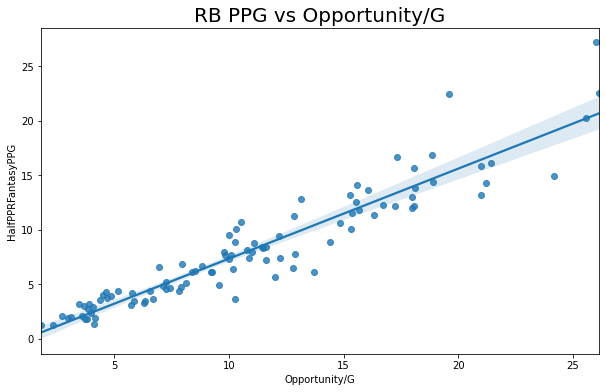

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=rb_df['Opportunity/G'], 
    y=rb_df['HalfPPRFantasyPPG'],
    scatter=True).set_title('RB PPG vs Opportunity/G', fontsize = 20)

Text(0.5, 1.0, 'RB Half PPR Fantasy Points vs Opportunity/G')

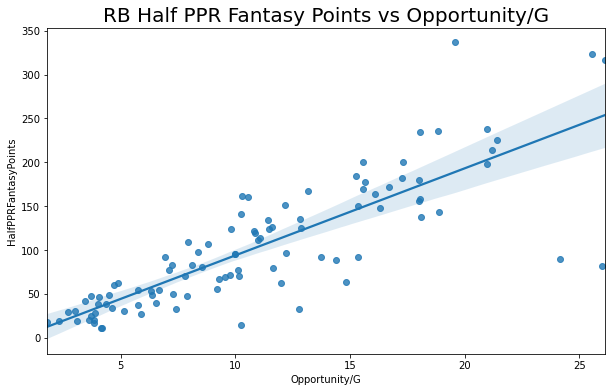

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=rb_df['Opportunity/G'], 
    y=rb_df['HalfPPRFantasyPoints'],
    scatter=True).set_title('RB Half PPR Fantasy Points vs Opportunity/G', fontsize = 20)

Text(0.5, 1.0, 'RB Fantasy Points vs Total Opportunity')

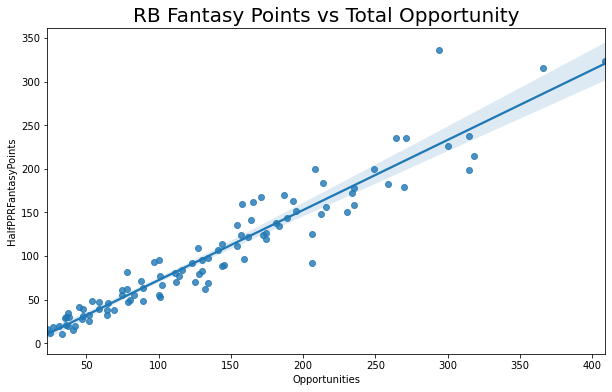

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=rb_df['Opportunities'], 
    y=rb_df['HalfPPRFantasyPoints'],
    scatter=True).set_title('RB Fantasy Points vs Total Opportunity', fontsize = 20)

Text(0.5, 1.0, 'WR PPG vs Opportunity/G')

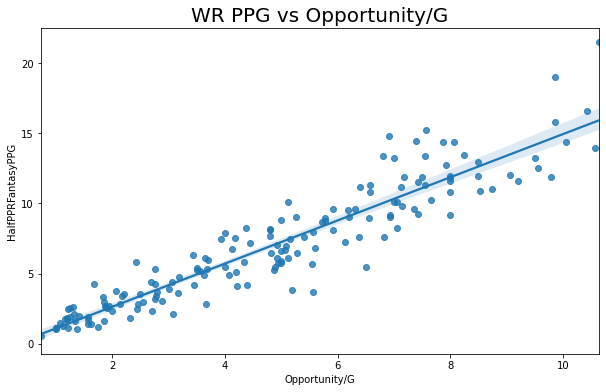

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=wr_df['Opportunity/G'], 
    y=wr_df['HalfPPRFantasyPPG'],
    scatter=True).set_title('WR PPG vs Opportunity/G', fontsize = 20)

Text(0.5, 1.0, 'RB Fantasy PPG vs Efficiency')

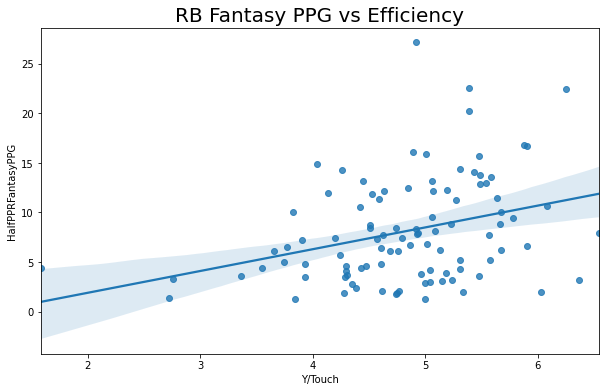

In [10]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=rb_df['Y/Touch'], 
    y=rb_df['HalfPPRFantasyPPG'],
    scatter=True).set_title('RB Fantasy PPG vs Efficiency', fontsize = 20)

 
#Opportunity per game is much higher correlated to Fantasy Points than efficiency

Text(0.5, 1.0, 'WR Fantasy PPG vs Efficiency')

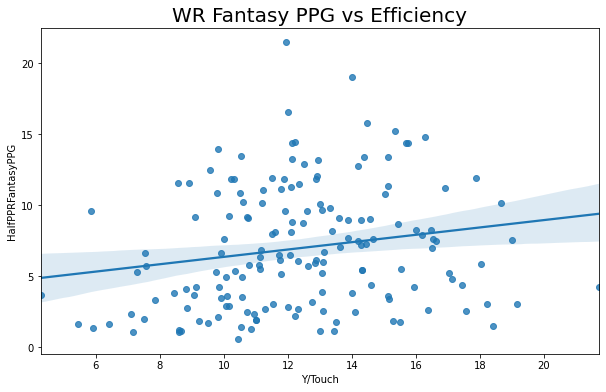

In [11]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=wr_df['Y/Touch'], 
    y=wr_df['HalfPPRFantasyPPG'],
    scatter=True).set_title('WR Fantasy PPG vs Efficiency', fontsize = 20)



Text(0.5, 1.0, 'TE Fantasy PPG vs Efficiency')

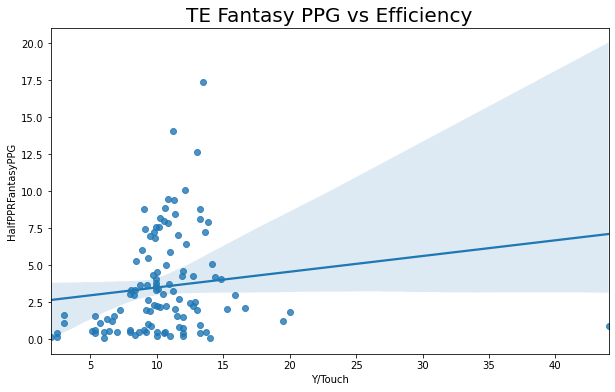

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=te_df['Y/Touch'], 
    y=te_df['HalfPPRFantasyPPG'],
    scatter=True).set_title('TE Fantasy PPG vs Efficiency', fontsize = 20)

Text(0.5, 1.0, 'Fantasy PPG vs TD/Opportunity')

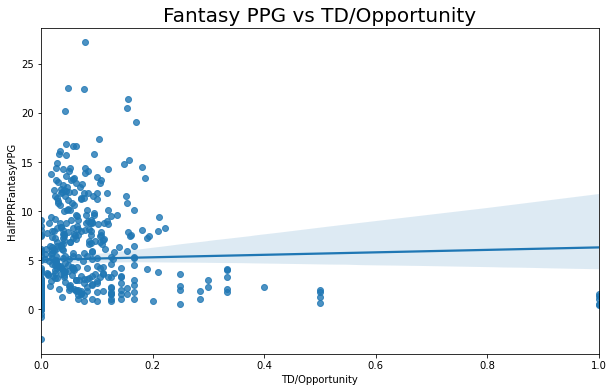

In [13]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(
    x=flex_df['TD/Opportunity'], 
    y=flex_df['HalfPPRFantasyPPG'],
    scatter=True).set_title('Fantasy PPG vs TD/Opportunity', fontsize = 20)

Text(0.5, 0, 'All Players Rushing Yards')

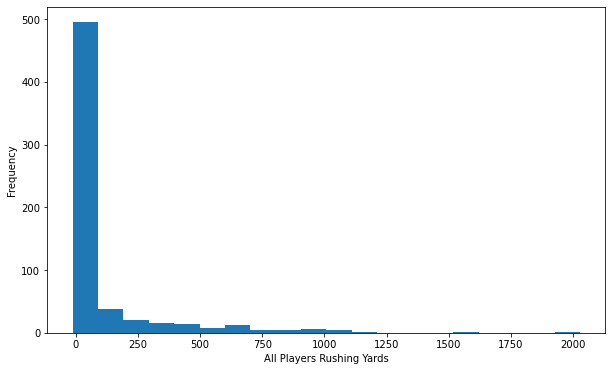

In [14]:
ax = df.RushingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax.set_xlabel('All Players Rushing Yards')

Text(0.5, 0, 'Flex Receiving Yards')

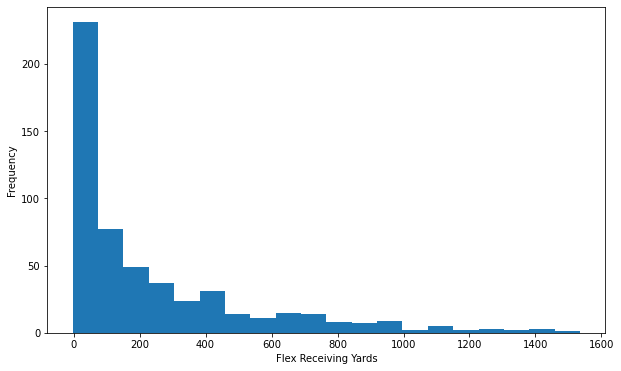

In [15]:
ax2 = flex_df.ReceivingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax2.set_xlabel('Flex Receiving Yards')


Text(0.5, 0, 'Passing Yards')

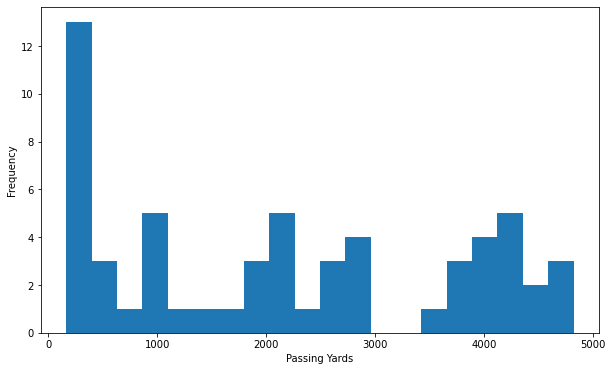

In [16]:
#QBpassing = df[df['PassingAtt'] > 50]
#ax3 = QBpassing.PassingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))

#Only plotting QBs with a minimum number of pass attempts

ax3 = qb_df.PassingYds.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax3.set_xlabel('Passing Yards')

Text(0.5, 0, 'RB Rushing TDs')

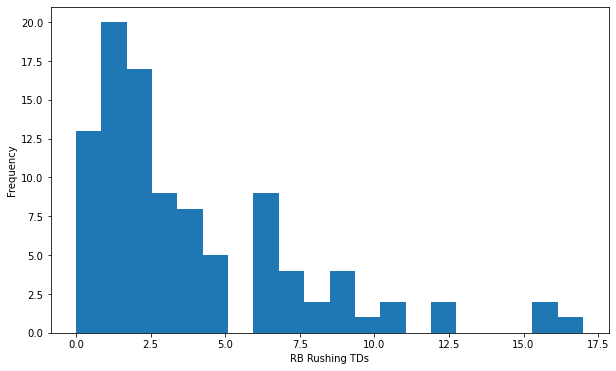

In [17]:
ax4 = rb_df.RushingTD.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax4.set_xlabel('RB Rushing TDs')

Text(0.5, 0, 'WR Receiving TDs')

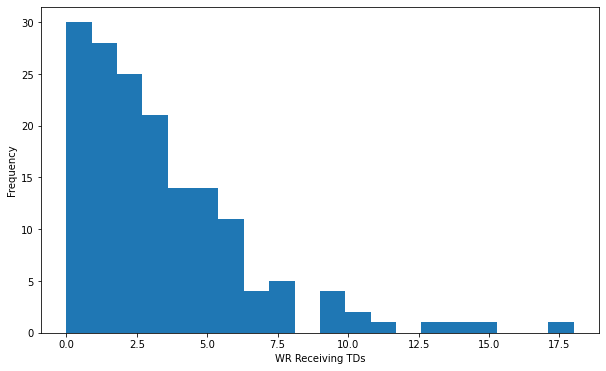

In [18]:
ax5 = wr_df.ReceivingTD.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax5.set_xlabel('WR Receiving TDs')

Text(0.5, 0, 'Flex Receiving TDs')

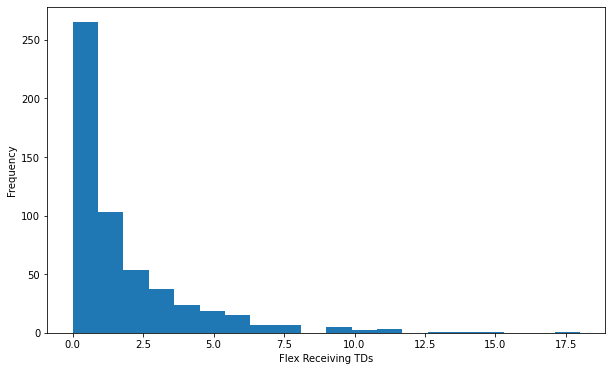

In [19]:
ax6 = flex_df.ReceivingTD.plot(kind = 'hist', bins=20, figsize=(10, 6))
ax6.set_xlabel('Flex Receiving TDs')

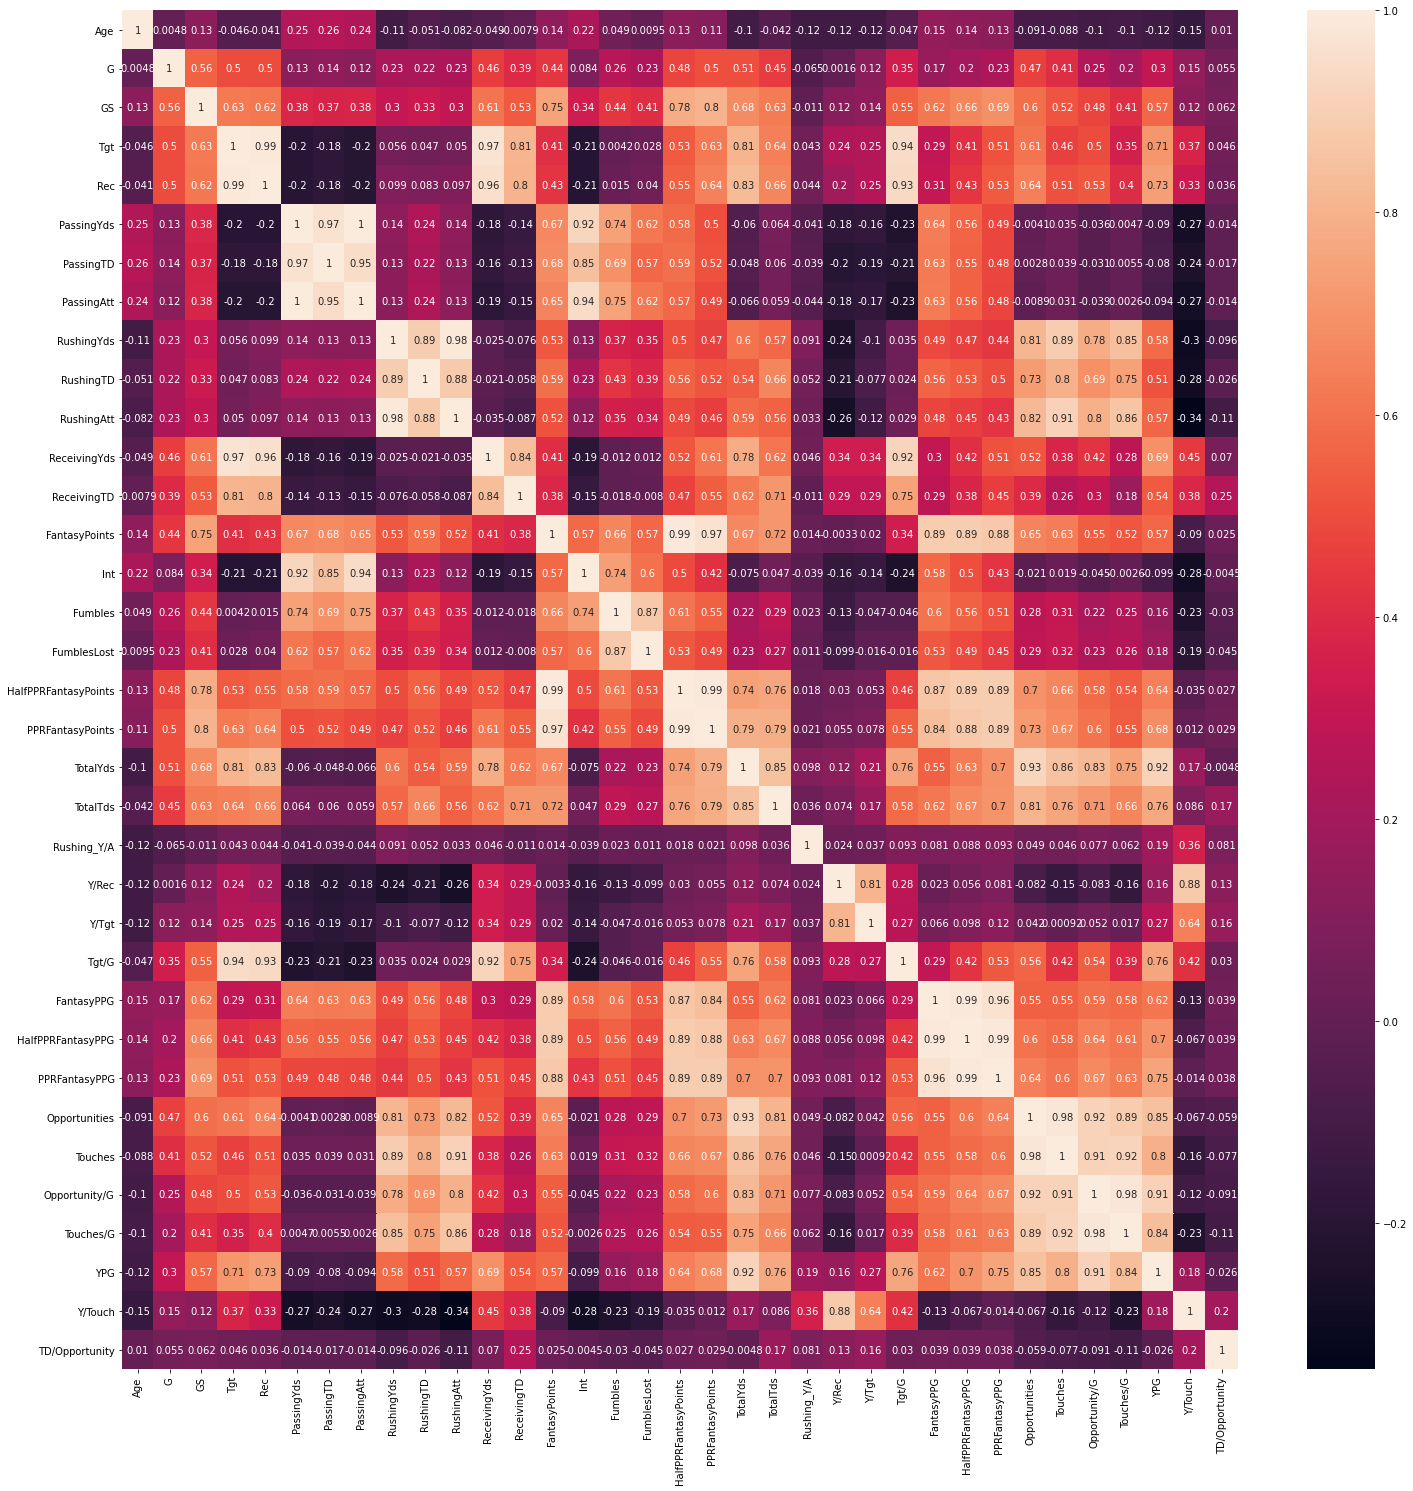

In [20]:
fig, ax = plt.subplots(figsize=(25,25)) 

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()
